In [3]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")
%matplotlib inline 
from pandas import Series

In [110]:
# Note this takes about 40 min to run if np.arange is set to 9951 as the stopping point.

pages = np.arange(1, 13500, 50) 
headers = {'Accept-Language': 'en-US,en;q=0.8'} 
#columns=['id_film', 'titre_film', 'dur´ee', 'genres_liste', 'date_sortie', 'utilisateur_note', 'nbre_utilisateur_note']
#initialize empty lists to store the variables scraped
titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
metascores = []
votes = []
#https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEwMTA1ODUsInR0MTA4ODg4ODgiLDEwMDAwXQ%3D%3D&ref_=adv_nxt
for page in pages:
  
   #get request for sci-fi
    response = get("https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&"
                  + "start="
                  + str(page)
                  + "&ref_=adv_nxt", headers=headers)
  
    sleep(randint(8,15))
   
   #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

   #parse the content of current iteration of request
    page_html = BeautifulSoup(response.text, 'html.parser')
      
    movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
  
   #extract the 50 movies for that page
    for container in movie_containers:

       #conditional for all with metascore
        if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
            title = container.h3.a.text
            titles.append(title)

            if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:
            
             #year released
                year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text# remove the parentheses around the year and make it an integer
                years.append(year)

            else:
                years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

            if container.find('div', class_ = 'ratings-metascore') is not None:
            
             #rating
                rating =  container.h3.span.text.replace(".","")
                ratings.append(rating)

            else:
                ratings.append("")

            if container.p.find('span', class_ = 'genre') is not None:
            
             #genre
                genre = container.p.find('span', class_ = 'genre').text.replace("\n", "").rstrip().split(',') # remove the whitespace character, strip, and split to create an array of genres
                genres.append(genre)
          
            else:
                genres.append("")

            if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
                time = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
                runtimes.append(time)

            else:
                runtimes.append(None)

            if float(container.strong.text) is not None:

             #IMDB ratings
                imdb = float(container.strong.text) # non-standardized variable
                imdb_ratings.append(imdb)

            else:
                imdb_ratings.append(None)

            if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
                m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
                metascores.append(m_score)

            else:
                metascores.append(None)

            if container.find('span', attrs = {'name':'nv'})['data-value'] is not None:

             #Number of votes
                vote = int(container.find('span', attrs = {'name':'nv'})['data-value'])
                votes.append(vote)

            else:
                votes.append(None)

        else:
                votes.append(None)

In [109]:
len(metascores)

98

In [111]:
#columns=['id_film', 'utilisateur_note', 'nbre_utilisateur_note']
sci_fi_df = pd.DataFrame({'titre_film': titles,
                      'date_sortie': years,
                      'id_film': ratings,
                      'genres_liste': genres,
                      'durée': runtimes,
                      'utilisateur_note': imdb_ratings,
                      'nbre_utilisateur_note': metascores}
                      )

#sci_fi_df.loc[:, 'date_sortie'] = sci_fi_df['date_sortie'].str[-5:-1] # two more data transformations after scraping
#Drop 'ovie' bug
# Make year an int
#sci_fi_df['utilisateur_note'] = sci_fi_df['utilisateur_note'] * 10
#final_df = sci_fi_df.loc[sci_fi_df['date_sortie'] != 'ovie'] # One small issue with the scrape on these two movies so just dropping those ones.
#final_df.loc[:, 'date_sortie'] = pd.to_numeric(final_df['date_sortie'])
df_part2 = sci_fi_df.to_csv('result3.csv',index = False)

In [10]:
df = pd.read_csv('imdb_movies.csv')


NameError: name 'to_csv' is not defined

### Q1. Nettoyer et coder vos donn´ees : correction d’erreurs, traitement de valeurs
### manquantes s’il y a lieu, ´eliminations des duplications, ´eliminations des
### lignes avec des valeurs ab´erantes, et correction du type des donn´ees (codage
### si c’est n´ecessaire).
### Remarques non ordonn´ees:
### • Supprimer les films dont la dur´ee n’est pas enregistr´ee.
### • Convertir la dur´ee de chaque film en minutes (entier).
### • Supprimer les films dont la dur´ee est ´egale `a 0.
### • Supprimer les films dont la dur´ee est tr`es ´elev´ee.
### • Convertir le nombre d’´evaluations de chaque film nbre utilisateur note
###`a une valeur enti`ere.
### • Supprimer les films qui ont un nombre d’´evaluations tr`es ´elev´ee.
### • Cr´eer une colonne pour chaque genre. Il ne faut laisser que les 5 genres 
### les plus cit´es et regrouper le reste dans une colonne autres genres.
### • Convertir date sortie au format datetime .
### • Supprimer les films qui n’ont pas de date de sortie enregistr´ee.

idFilm                    0
titreFilm                 0
duree                  3154
genresListe             721
dateSortie             1936
utilisateurNote        5270
nbreUtilisateurVote    5270
dtype: int64

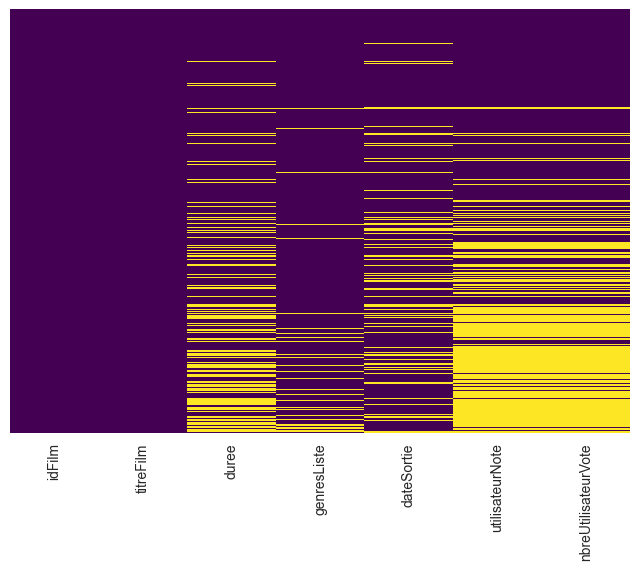

In [778]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
df.isnull().sum()

In [779]:
pd.set_option('display.max_rows',10)
df['nbreUtilisateurVote'].replace(',','', regex=True, inplace=True)
# cou = df['nbre_utilisateur_note'].value_counts()
# #df['nbre_utilisateur_note'].str.contains('partial_string').any()
# df['nbre_utilisateur_note'] = df['nbre_utilisateur_note'].str.replace(',','').astype(int)


In [780]:

df["utilisateurNote"].fillna(df["utilisateurNote"].median(), inplace=True)
df["nbreUtilisateurVote"].fillna(df["nbreUtilisateurVote"].median(), inplace=True)
df=df.dropna(subset=["genresListe"],axis=0).copy()
#convert columns values to int
df['nbreUtilisateurVote'] = df['nbreUtilisateurVote'].astype('int')
# Éliminer les valeurs aberrantes catégoriques"genres_liste"
def calcul_frequence(x, table_frequence):
    return table_frequence[x]

table_frequence = df["genresListe"].value_counts() 
index = df["genresListe"].apply(lambda x : calcul_frequence(x, table_frequence)) > 1 
df = df[index]
print(df)
print(table_frequence)

# Éliminer les valeurs aberrantes numériques column"utilisateur_note"
Q1 = df["utilisateurNote"].quantile(0.25)
Q3 = df["utilisateurNote"].quantile(0.75)
IQR = Q3 - Q1
max = df["utilisateurNote"] > (Q3 + 1.5 * IQR)
min = df["utilisateurNote"] < (Q1 - 1.5 * IQR)
index = ~(max | min)
df = df[index]
print(df)

# Éliminer les valeurs aberrantes numériques column"nbreUtilisateurVote"
Q1 = df["nbreUtilisateurVote"].quantile(0.25)
Q3 = df["nbreUtilisateurVote"].quantile(0.75)
IQR = Q3 - Q1
max = df["nbreUtilisateurVote"] > (Q3 + 1.5 * IQR)
min = df["nbreUtilisateurVote"] < (Q1 - 1.5 * IQR)
index = ~(max | min)
df = df[index]
print(df)
df.dtypes

         idFilm                      titreFilm  duree  \
0       1825683                  Black Panther  134.0   
1       7784604                     Hereditary  127.0   
2       4560436                        Mile 22   94.0   
3       4154756         Avengers: Infinity War  149.0   
4       1034415                       Suspiria  152.0   
...         ...                            ...    ...   
12912  23722356                          Efeyo    NaN   
12913  23724074         VÃ­ctimas de tratantes   89.0   
12914  23731006                  My Final Wife    NaN   
12916  23768836  El diario de una prostituta 3    NaN   
12917  23769210             Perras de barrio 5    NaN   

                     genresListe  dateSortie  utilisateurNote  \
0      Action, Adventure, Sci-Fi  2018-02-16              7.3   
1         Drama, Horror, Mystery  2018-06-08              7.3   
2               Action, Thriller  2018-08-17              6.1   
3      Action, Adventure, Sci-Fi  2018-04-27           

idFilm                   int64
titreFilm               object
duree                  float64
genresListe             object
dateSortie              object
utilisateurNote        float64
nbreUtilisateurVote      int32
dtype: object

In [781]:
df=df.dropna(subset=["duree"],axis=0).copy()
df

,idFilm,titreFilm,duree,genresListe,dateSortie,utilisateurNote,nbreUtilisateurVote
280,5658672,Peripheral,89.0,"Horror, Sci-Fi",2020-08-03,4.8,226
297,7490386,Mar,103.0,Drama,2019-05-16,5.5,49
453,9081562,Bi bei shang geng bei shang de gu shi,105.0,Romance,2018-11-30,6.2,124
528,7087210,Donnybrook,101.0,"Action, Drama, Thriller",2019-02-15,5.4,226
540,5233090,Yinz,89.0,Thriller,2018-10-19,5.1,120
...,...,...,...,...,...,...,...
12904,8280720,3X,120.0,Drama,2018-07-24,6.0,109
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52.0,"Animation, Drama",2018-08-11,6.0,109
12906,15590602,Along Bordering Lines,80.0,Drama,NaN,6.0,109
12907,12539530,Hume Jeene Do,52.0,Drama,2018-01-22,6.0,109


In [782]:
df['duree'] = df['duree'].astype('int')

In [783]:
df[df.duree == 0]
df.loc[(df['duree'] == 0)]

,idFilm,titreFilm,duree,genresListe,dateSortie,utilisateurNote,nbreUtilisateurVote


In [784]:
df.loc[df['duree']!=df['duree'].max()]
df.drop(df['duree'].idxmax())
df.loc[df['utilisateurNote']!=df['utilisateurNote'].max()]
df.drop(df['utilisateurNote'].idxmax())
df

,idFilm,titreFilm,duree,genresListe,dateSortie,utilisateurNote,nbreUtilisateurVote
280,5658672,Peripheral,89,"Horror, Sci-Fi",2020-08-03,4.8,226
297,7490386,Mar,103,Drama,2019-05-16,5.5,49
453,9081562,Bi bei shang geng bei shang de gu shi,105,Romance,2018-11-30,6.2,124
528,7087210,Donnybrook,101,"Action, Drama, Thriller",2019-02-15,5.4,226
540,5233090,Yinz,89,Thriller,2018-10-19,5.1,120
...,...,...,...,...,...,...,...
12904,8280720,3X,120,Drama,2018-07-24,6.0,109
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,"Animation, Drama",2018-08-11,6.0,109
12906,15590602,Along Bordering Lines,80,Drama,NaN,6.0,109
12907,12539530,Hume Jeene Do,52,Drama,2018-01-22,6.0,109


In [785]:
# Prix_eleve = df.groupby(['genres_liste']).agg({'genres_liste':['max']})
# Prix_eleve.columns = ['genres_max'] 

pd.set_option('display.max_rows',10)

df_count = df['genresListe'].value_counts()
df_cou = df_count.iloc[0:5]
print(df_cou)
print("------------------------------------------")
df_cou_rest = df_count.iloc[5:]
print(df_cou_rest)

Drama            1267
Comedy            387
Comedy, Drama     151
Thriller          143
Horror            122
Name: genresListe, dtype: int64
------------------------------------------
Drama, Romance              108
Action                      103
Romance                      91
Animation                    67
Comedy, Romance              59
                           ... 
Drama, Family, Musical        1
Comedy, Mystery, Romance      1
Fantasy, Sci-Fi               1
Action, Comedy, Romance       1
Action, Drama, War            1
Name: genresListe, Length: 256, dtype: int64


In [788]:
df['genresListe'].replace(' ','', regex=True, inplace=True)
# df_genre = df['genresListe'].str.split(',').apply(Series, 1).stack()
s = df['genresListe'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genresListe_new'
del df['genresListe']
df = df.join(s)


In [791]:
df_genere = df['genresListe_new'].value_counts()
df_genere

Drama         2189
Comedy         938
Romance        387
Thriller       383
Action         302
              ... 
War             28
Reality-TV       9
Talk-Show        7
Western          6
News             5
Name: genresListe_new, Length: 23, dtype: int64

In [811]:
for a,b in df.iterrows():
    if b['genresListe_new'] ==  'Drama' or b['genresListe_new'] == 'Drama':
        df.at[a, 'Drama'] = 'Drama'
    elif b['genresListe_new'] == "Comedy" or b['genresListe_new'] == "Comedy" :
        df.at[a, 'Comedy'] = "Comedy"
    elif b['genresListe_new'] == 'Romance' or b['genresListe_new'] == 'Romance':
        df.at[a, 'Romance'] = 'Romance'
    elif b['genresListe_new'] == 'thriller' or b['genresListe_new'] == 'Thriller':
        df.at[a, 'Thriller'] = 'Thriller'
    elif b['genresListe_new'] == 'Action' or b['genresListe_new'] == 'Action':
        df.at[a, 'Action'] = 'Action' 
        
        
for a,b in df.iterrows():
    if b['genresListe_new'] ==  'Drama' or b['genresListe_new'] == 'Drama':
        df.at[a, 'genre_cat'] = 'Drama'
    elif b['genresListe_new'] == "Comedy" or b['genresListe_new'] == "Comedy" :
        df.at[a, 'genre_cat'] = "Comedy"
    elif b['genresListe_new'] == 'Romance' or b['genresListe_new'] == 'Romance':
        df.at[a, 'genre_cat'] = 'Romance'
    elif b['genresListe_new'] == 'thriller' or b['genresListe_new'] == 'Thriller':
        df.at[a, 'genre_cat'] = 'Thriller'
    elif b['genresListe_new'] == 'Action' or b['genresListe_new'] == 'Action':
        df.at[a, 'genre_cat'] = 'Action'         
# df    

# new = pd.concat([df.drop('genresListe', axis=1), df['genresListe'].str.replace(' ','').str.get_dummies(sep=',')],axis=1)
# new
df

,idFilm,titreFilm,duree,dateSortie,utilisateurNote,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
280,5658672,Peripheral,89,2020-08-03,4.8,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
280,5658672,Peripheral,89,2020-08-03,4.8,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
297,7490386,Mar,103,2019-05-16,5.5,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
453,9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,6.2,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
528,7087210,Donnybrook,101,2019-02-15,5.4,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,11647038,Rieg - 12:00,79,2018-04-20,6.0,109,Music,NaN,NaN,NaN,NaN,NaN,Music,6.303781,6.768184,NaN
12904,8280720,3X,120,2018-07-24,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.906891,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Animation,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama


In [723]:
# # genresListe_new_min = df.loc[(df['genresListe_new'] != 'Drama') & (df['genresListe_new'] != 'Comedy') & (df['genresListe_new'] != 'Romance') & (df['genresListe_new'] != 'thriller') & (df['genresListe_new'] != 'Action')]
# # genresListe_new_min['genresListe_new']
# # df['genresListe_new_min'] = df['genresListe_new'].all().map(genresListe_new_min).fillna('nan')
# df_genre = df['genresListe_new']
# df_min = [] 
# for x in df_genre:
#     if x != 'Drama' and x != 'Comedy' and x != 'Romance' and x != 'Thriller' and x !='Action':
#         df_min.append(x)
# # print(df_min) 
# df1 = pd.DataFrame({'genresListe_new_min':df_min})
# # df1 = df1.set_index("genresListe_new_min")
# # df = df.set_index("titreFilm")
# # df = pd.concat([df,df1], ignore_index=True, axis=1)

# # # df['genresListe_new_min'] = df_min.insert(genresListe_new_min).fillna('nan')
# df1['genresListe_new_min'].unique()

array(['Horror', 'Sci-Fi', 'Fantasy', 'Mystery', 'History', 'Animation',
       'Crime', 'Sport', 'Adventure', 'Family', 'Music', 'War',
       'Biography', 'Western', 'Musical', 'Reality-TV', 'Talk-Show',
       'News'], dtype=object)

In [812]:
for a,b in df.iterrows():
    if b['genresListe_new'] == 'Horror' or b['genresListe_new'] == 'Horror':
        df.at[a, 'autres genres'] = 'Horror'
    elif b['genresListe_new'] == 'Sci-Fi' or b['genresListe_new'] == 'Sci-Fi':
        df.at[a, 'autres genres'] = 'Sci-Fi'
    elif b['genresListe_new'] == 'Fantasy' or b['genresListe_new'] == 'Fantasy':
        df.at[a, 'autres genres'] = 'Fantasy'
    elif b['genresListe_new'] == 'Fantasy' or b['genresListe_new'] == 'Fantasy':
        df.at[a, 'autres genres'] = 'Fantasy'
    elif b['genresListe_new'] == 'History' or b['genresListe_new'] == 'History':
        df.at[a, 'autres genres'] = 'History'     
    if b['genresListe_new'] == 'Animation' or b['genresListe_new'] == 'Animation':
        df.at[a, 'autres genres'] = 'Animation'
    elif b['genresListe_new'] == 'Crime' or b['genresListe_new'] == 'Crime':
        df.at[a, 'autres genres'] = 'Crime'
    elif b['genresListe_new'] == 'Sport' or b['genresListe_new'] == 'Sport':
        df.at[a, 'autres genres'] = 'Sport'
    elif b['genresListe_new'] == 'Adventure' or b['genresListe_new'] == 'Adventure':
        df.at[a, 'autres genres'] = 'Adventure'
    elif b['genresListe_new'] == 'Family' or b['genresListe_new'] == 'Family':
        df.at[a, 'autres genres'] = 'Family'  
    if b['genresListe_new'] == 'Music' or b['genresListe_new'] == 'Music':
        df.at[a, 'autres genres'] = 'Music'
    elif b['genresListe_new'] == 'War' or b['genresListe_new'] == 'War':
        df.at[a, 'autres genres'] = 'War'
    elif b['genresListe_new'] == 'Biography' or b['genresListe_new'] == 'Biography':
        df.at[a, 'autres genres'] = 'Biography'
    elif b['genresListe_new'] == 'Western' or b['genresListe_new'] == 'Western':
        df.at[a, 'autres genres'] = 'Western'
    elif b['genresListe_new'] == 'Musical' or b['genresListe_new'] == 'Musical':
        df.at[a, 'autres genres'] = 'Musical'      
    if b['genresListe_new'] == 'Reality-TV' or b['genresListe_new'] == 'Reality-TV':
        df.at[a, 'autres genres'] = 'Reality-TV'
    elif b['genresListe_new'] == 'Talk-Show' or b['genresListe_new'] == 'Talk-Show':
        df.at[a, 'autres genres'] = 'Talk-Show'
    elif b['genresListe_new'] == 'News' or b['genresListe_new'] == 'News':
        df.at[a, 'autres genres'] = 'News'     
df        

,idFilm,titreFilm,duree,dateSortie,utilisateurNote,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
280,5658672,Peripheral,89,2020-08-03,4.8,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
280,5658672,Peripheral,89,2020-08-03,4.8,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
297,7490386,Mar,103,2019-05-16,5.5,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
453,9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,6.2,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
528,7087210,Donnybrook,101,2019-02-15,5.4,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,11647038,Rieg - 12:00,79,2018-04-20,6.0,109,Music,NaN,NaN,NaN,NaN,NaN,Music,6.303781,6.768184,NaN
12904,8280720,3X,120,2018-07-24,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.906891,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Animation,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama


In [813]:
df=df.dropna(subset=["dateSortie"],axis=0).copy()
df

,idFilm,titreFilm,duree,dateSortie,utilisateurNote,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
280,5658672,Peripheral,89,2020-08-03,4.8,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
280,5658672,Peripheral,89,2020-08-03,4.8,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
297,7490386,Mar,103,2019-05-16,5.5,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
453,9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,6.2,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
528,7087210,Donnybrook,101,2019-02-15,5.4,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,11647038,Rieg - 12:00,79,2018-04-20,6.0,109,Music,NaN,NaN,NaN,NaN,NaN,Music,6.303781,6.768184,NaN
12904,8280720,3X,120,2018-07-24,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.906891,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Animation,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama


### Q2) Créer 2 nouvelle colonnes dur´ee minutes log, nbre utilisateur note log.
### • Appliquer la fonction logarithmique sur la colonne dur´ee pour avoir
### la nouvelle colonne dur´ee minutes log.
### • Appliquer la fonction logarithmique sur la colonne nbre utilisateur note
### pour avoir la nouvelle colonne nbre utilisateur note log.

In [814]:
df['dureeMinutesLog'] = np.log2(df['duree'])
df['nbreUtilisateurNoteLog'] = np.log2(df['nbreUtilisateurVote'])
df

,idFilm,titreFilm,duree,dateSortie,utilisateurNote,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
280,5658672,Peripheral,89,2020-08-03,4.8,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
280,5658672,Peripheral,89,2020-08-03,4.8,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
297,7490386,Mar,103,2019-05-16,5.5,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
453,9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,6.2,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
528,7087210,Donnybrook,101,2019-02-15,5.4,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12898,11647038,Rieg - 12:00,79,2018-04-20,6.0,109,Music,NaN,NaN,NaN,NaN,NaN,Music,6.303781,6.768184,NaN
12904,8280720,3X,120,2018-07-24,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.906891,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Animation,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama
12905,7279608,"Deep Meaning aka: Neglect, Hate & Self Shame",52,2018-08-11,6.0,109,Drama,Drama,NaN,NaN,NaN,NaN,Animation,5.700440,6.768184,Drama


idFilm                       0
titreFilm                    0
duree                        0
dateSortie                   0
utilisateurNote              0
                          ... 
Comedy                    3359
autres genres             2687
dureeMinutesLog              0
nbreUtilisateurNoteLog       0
genre_cat                  634
Length: 16, dtype: int64

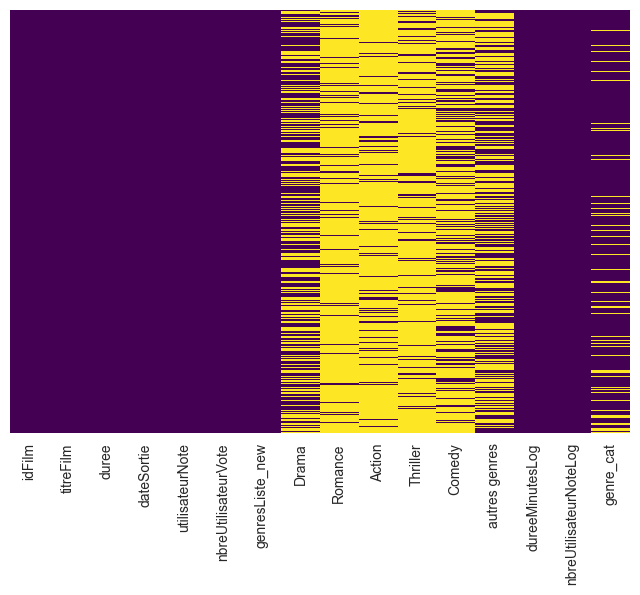

In [815]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
df.isnull().sum()

### Q3. R´ealiser une analyse univari´ee compl`ete avec les visualisations ad´equates
### et interpr´eter les r´esultats.

In [816]:
df_train = df.set_index("idFilm")
df_train.head()

,titreFilm,duree,dateSortie,utilisateurNote,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
idFilm,,,,,,,,,,,,,,,
5658672,Peripheral,89,2020-08-03,4.8,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
5658672,Peripheral,89,2020-08-03,4.8,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
7490386,Mar,103,2019-05-16,5.5,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,6.2,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
7087210,Donnybrook,101,2019-02-15,5.4,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller


### Variable Identification

**1. Tout d'abord, identifiez les variables Predictor (Input) et Target (output)**

In [817]:
# Nous devons prédire si le passager est survécu ou non donc notre variable cible (Sortie) sera "utilisateurNote"
# et les colonnes restantes seront des prédicteurs (variables d'entrée)
y = targets = labels = output_var = df_train["utilisateurNote"]
X = predictors = input_var = df_train.loc[:,df_train.columns != "utilisateurNote"]
X.head()

,titreFilm,duree,dateSortie,nbreUtilisateurVote,genresListe_new,Drama,Romance,Action,Thriller,Comedy,autres genres,dureeMinutesLog,nbreUtilisateurNoteLog,genre_cat
idFilm,,,,,,,,,,,,,,
5658672,Peripheral,89,2020-08-03,226,Horror,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
5658672,Peripheral,89,2020-08-03,226,Sci-Fi,NaN,NaN,NaN,NaN,NaN,Sci-Fi,6.475733,7.820179,NaN
7490386,Mar,103,2019-05-16,49,Drama,Drama,NaN,NaN,NaN,NaN,NaN,6.686501,5.614710,Drama
9081562,Bi bei shang geng bei shang de gu shi,105,2018-11-30,124,Romance,NaN,Romance,NaN,NaN,NaN,NaN,6.714246,6.954196,Romance
7087210,Donnybrook,101,2019-02-15,226,Action,Drama,NaN,Action,Thriller,NaN,NaN,6.658211,7.820179,Thriller


In [818]:
y.head()

idFilm
5658672    4.8
5658672    4.8
7490386    5.5
9081562    6.2
7087210    5.4
Name: utilisateurNote, dtype: float64

In [819]:
print("Input Variables", list(X.columns))
print("Output Variable", "['utilisateurNote']")

Input Variables ['titreFilm', 'duree', 'dateSortie', 'nbreUtilisateurVote', 'genresListe_new', 'Drama', 'Romance', 'Action', 'Thriller', 'Comedy', 'autres genres', 'dureeMinutesLog', 'nbreUtilisateurNoteLog', 'genre_cat']
Output Variable ['utilisateurNote']


**2 Identifier le type de données des variables.**

In [820]:
datatype = df.dtypes
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['titreFilm', 'dateSortie', 'genresListe_new', 'Drama', 'Romance', 'Action', 'Thriller', 'Comedy', 'autres genres', 'genre_cat']
Numerical Columns : ['idFilm', 'utilisateurNote', 'dureeMinutesLog', 'nbreUtilisateurNoteLog']


## Analyse univariée

1. Nous explorons les variables une par une.
2. La méthode d'exécution de l'analyse univariée dépendra du type de variable, qu'il soit catégoriel ou continu.

**Analyse variable continue**

  - Mesure de la tendance centrale (moyenne, médiane, mode) de la variable.
  - Mesure de la propagation (plage, IQR, variance, écart type) de la variable.
  - Mesure de la forme (distribution symétrique, par exemple distribution normale, distribution asymétrique (distribution asymétrique gauche ou droite), aplatissement (forme de la distribution en termes de hauteur ou de planéité)

**Analyse des variables catégorielles**

  - Pour les variables catégorielles, nous utiliserons la distribution de fréquence de chaque catégorie, par exemple un graphique à barres, un graphique à secteurs

In [821]:
df[df.columns[1:]].describe(include = ['float64','int64','int32'])


,duree,utilisateurNote,nbreUtilisateurVote,dureeMinutesLog,nbreUtilisateurNoteLog
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000
mean,94.061338,5.958282,110.032425,6.496019,6.700024
std,29.535608,0.513365,36.593407,0.415464,0.499981
min,10.000000,4.600000,39.000000,3.321928,5.285402
25%,79.000000,5.900000,104.000000,6.303781,6.700440
50%,91.000000,6.000000,109.000000,6.507795,6.768184
75%,105.000000,6.000000,109.000000,6.714246,6.768184
max,720.000000,7.300000,226.000000,9.491853,7.820179


Text(0, 0.5, 'nombre de repitition de la note')

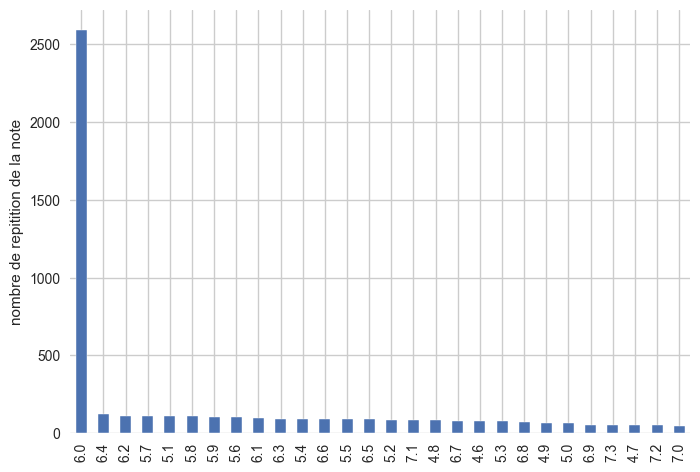

In [822]:
df_utilisateurNote = df['utilisateurNote'].value_counts()
#df_region = df.groupby(['Région']).count()
df_utilisateurNote.plot(kind='bar').set_ylabel("nombre de repitition de la note")


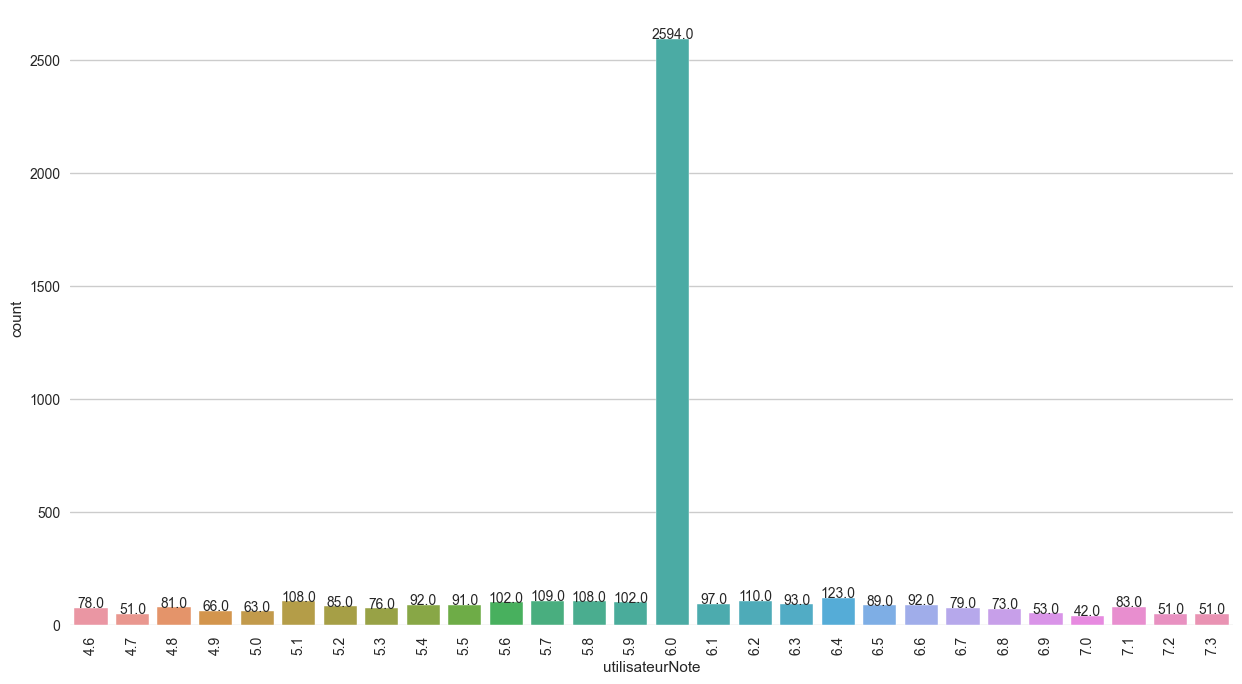

In [823]:
# Permet d'afficher le nombre count pour chaque note
àfig, ax1 = plt.subplots(figsize=(15,8))
graph = sns.countplot(ax=ax1,x='utilisateurNote', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<AxesSubplot: ylabel='genre_cat'>

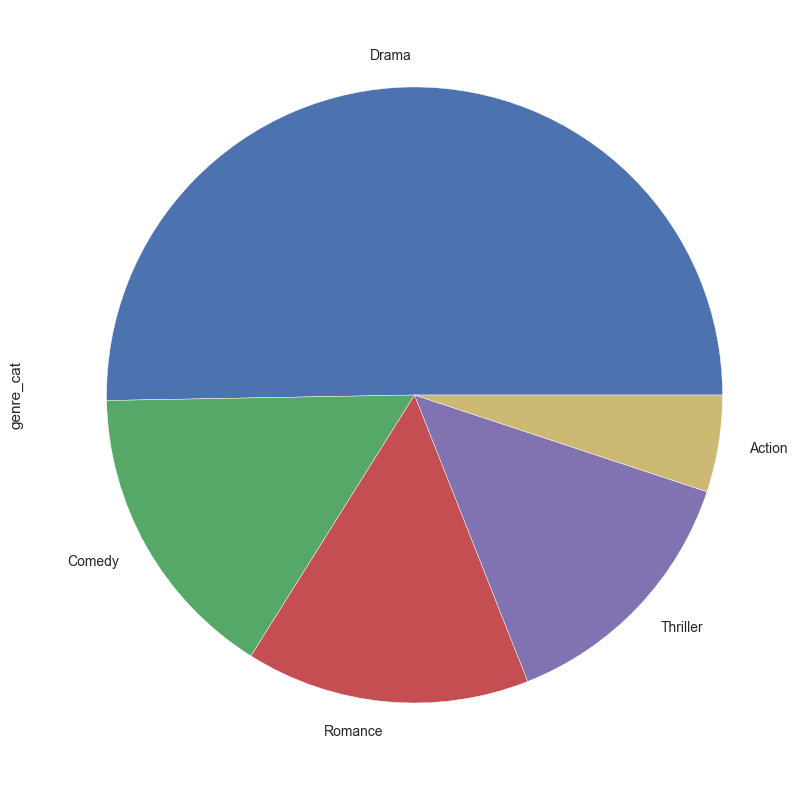

In [824]:
df['genre_cat'].value_counts().plot(kind = 'pie', figsize = (10,10))

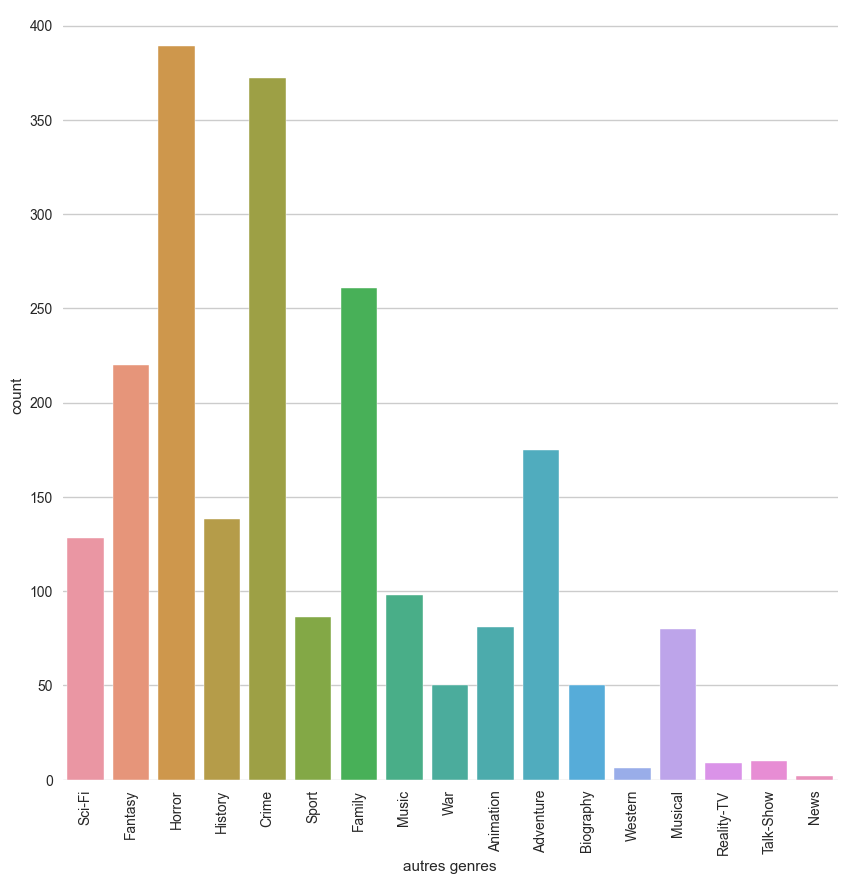

In [825]:
plt.figure(figsize=(10,10))
sns.countplot(x='autres genres', data=df)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, "nombre d'genresListe")

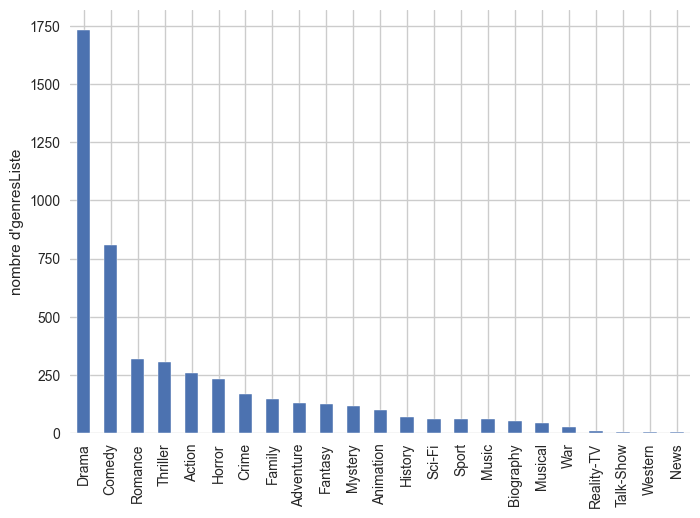

In [826]:
df_utilisateurNote = df['genresListe_new'].value_counts()
#df_region = df.groupby(['Région']).count()
df_utilisateurNote.plot(kind='bar').set_ylabel("nombre d'genresListe")

C:\Users\Yough\AppData\Local\Temp\ipykernel_34792\820658691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duree'])


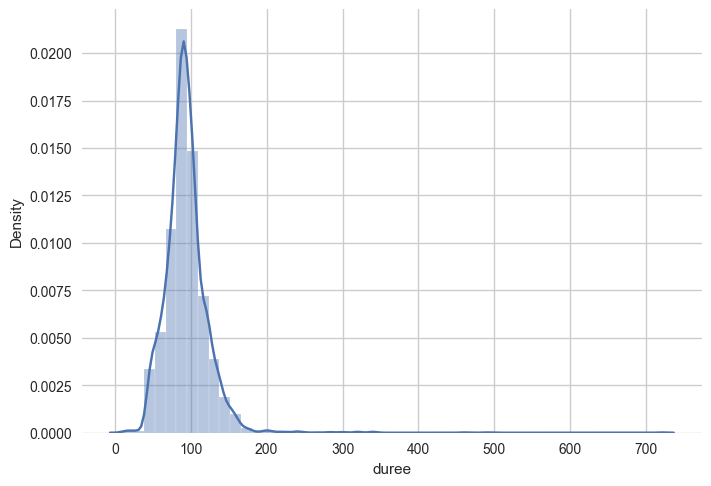

In [827]:
sns.distplot(df['duree'])
plt.show()

C:\Users\Yough\AppData\Local\Temp\ipykernel_34792\242440712.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


TypeError: strptime() argument 1 must be str, not Series

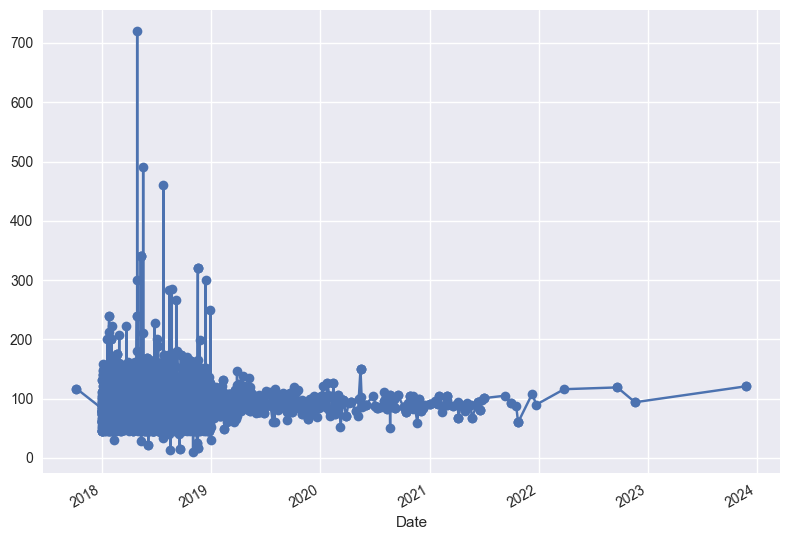

In [828]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

df['dateSortie'] = pd.to_datetime(df['dateSortie'])
df.sort_values('dateSortie', inplace=True)

price_date = df['dateSortie']
price_close = df['duree']

plt.plot_date(price_date, price_close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('')
plt.xlabel('Date')
plt.ylabel('')

plt.tight_layout()
from datetime import datetime
date_time_obj = datetime.strptime(df_date, '%y/%m/%d')


print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)
plt.show()


df

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000')])

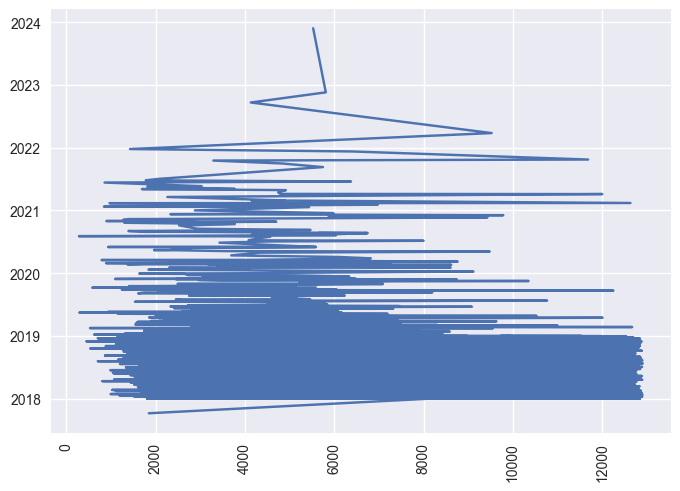

In [829]:
df = df.sort_values('dateSortie', ascending=True)
plt.plot(df['dateSortie'])
plt.xticks(rotation='vertical')

<AxesSubplot: ylabel='dateSortie'>

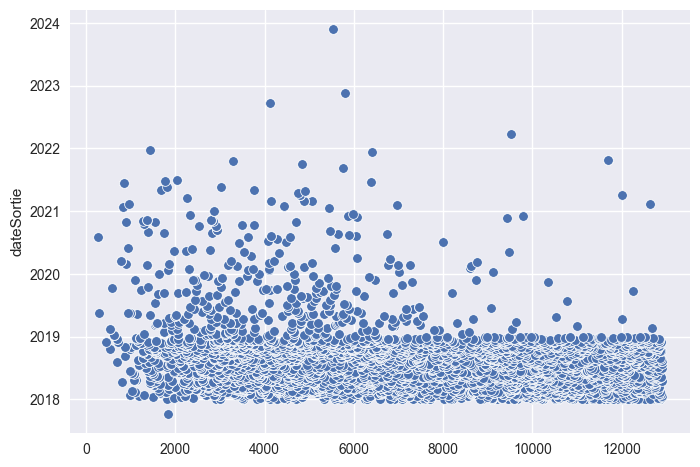

In [830]:
sns.scatterplot(data=df['dateSortie'])

<AxesSubplot: ylabel='duree'>

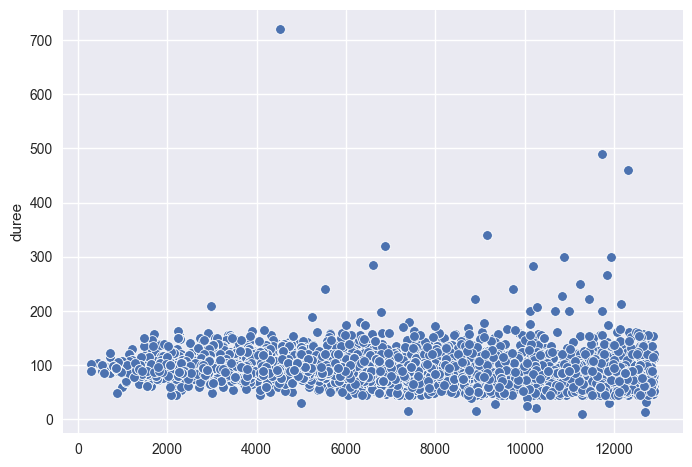

In [831]:
sns.scatterplot(data=df['duree'])

### ---------------------------------------------------------------------------------------------------------------------------------------------

Q3. R´ealiser une analyse univari´ee compl`ete avec les visualisations ad´equates
et interpr´eter les r´esultats.

## Analyse bivariée

1. Nous effectuons une analyse bivariée avec 2 variables pour toute combinaison de variables catégorielles et continues.
3. La combinaison peut être : catégorielle et catégorielle, catégorielle et continue et continue et continue.
4. Différentes méthodes sont utilisées pour aborder ces combinaisons au cours du processus d'analyse.

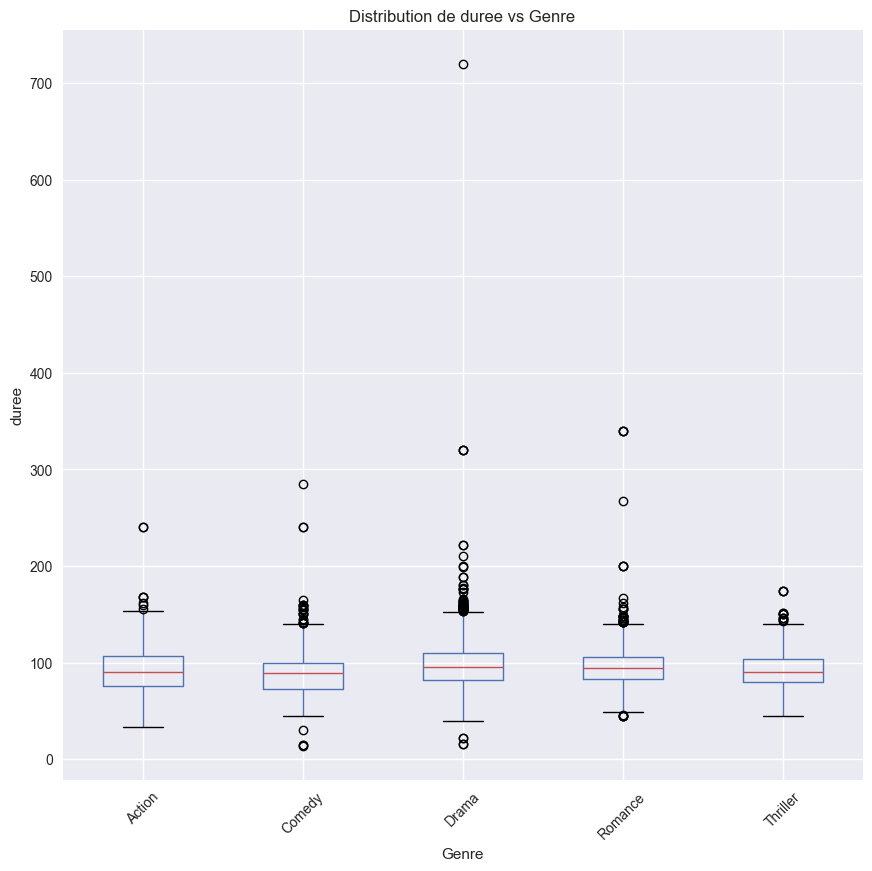

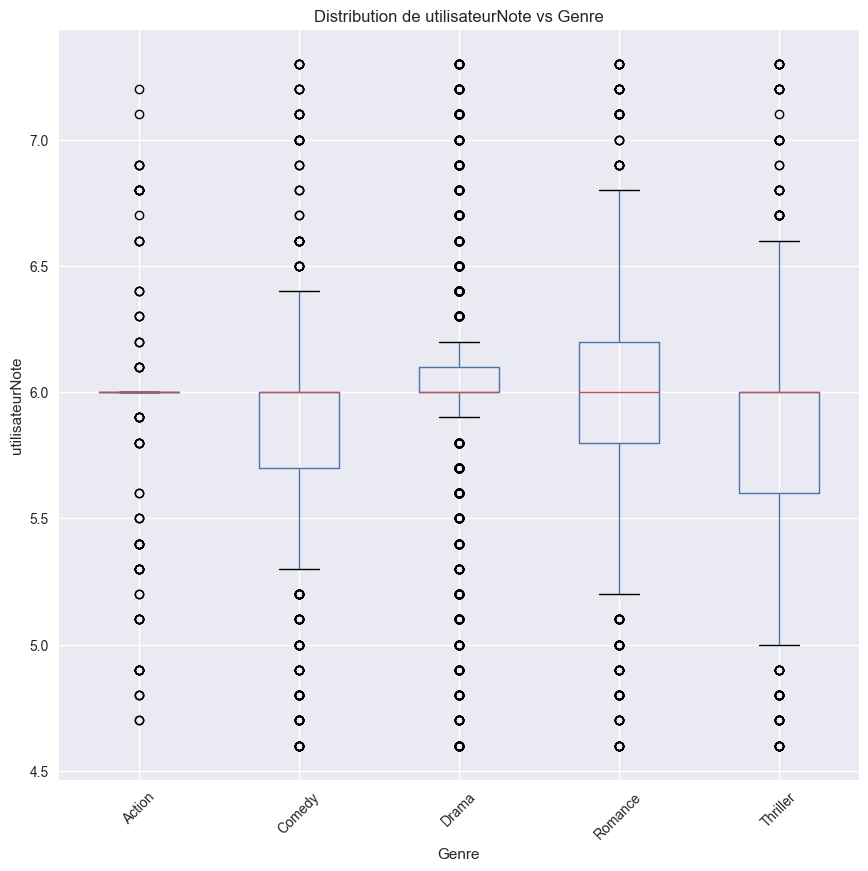

In [832]:
fig1 = df.boxplot(column=['duree'],by ='genre_cat', rot = 45, figsize = (10,10))
#Create Title
plt.title('Distribution de duree vs Genre')
plt.suptitle('')
plt.ylabel('duree')
plt.xlabel('Genre')
#Show Plot
plt.show()

#Create Box Plot
fig1 = df.boxplot(column=['utilisateurNote'],by ='genre_cat', rot = 45, figsize = (10,10))
#Create Title
plt.title('Distribution de utilisateurNote vs Genre')
plt.suptitle('')
plt.ylabel('utilisateurNote')
plt.xlabel('Genre')
#Show Plot
plt.show()

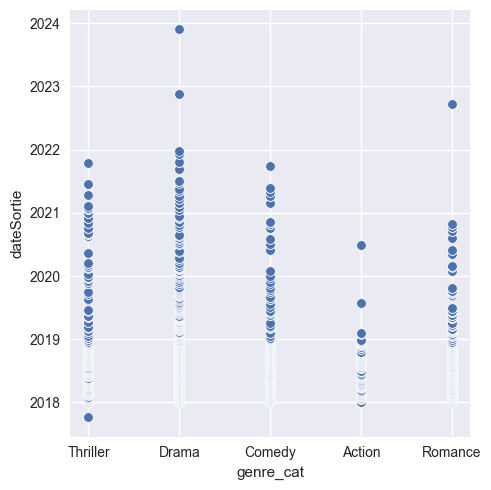

In [833]:
g = sns.relplot(
    data=df, x="genre_cat", y="dateSortie",
    kind="scatter")

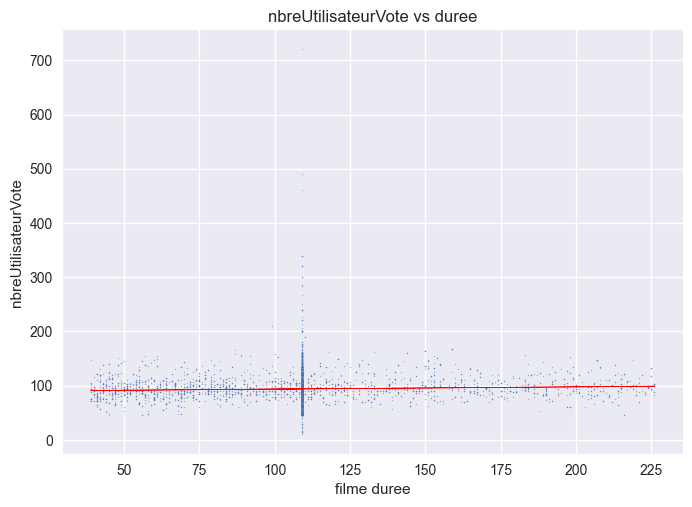

In [834]:
plt.plot(df.nbreUtilisateurVote, df.duree, 'o', markersize =1, alpha = 0.5)
m, b = np.polyfit(df.nbreUtilisateurVote, df.duree, 1)
plt.plot(df.nbreUtilisateurVote, m*df.nbreUtilisateurVote + b, 'red', linewidth = 0.5)
plt.xlabel('filme duree')
plt.ylabel('nbreUtilisateurVote')
plt.title('nbreUtilisateurVote vs duree')
plt.show()


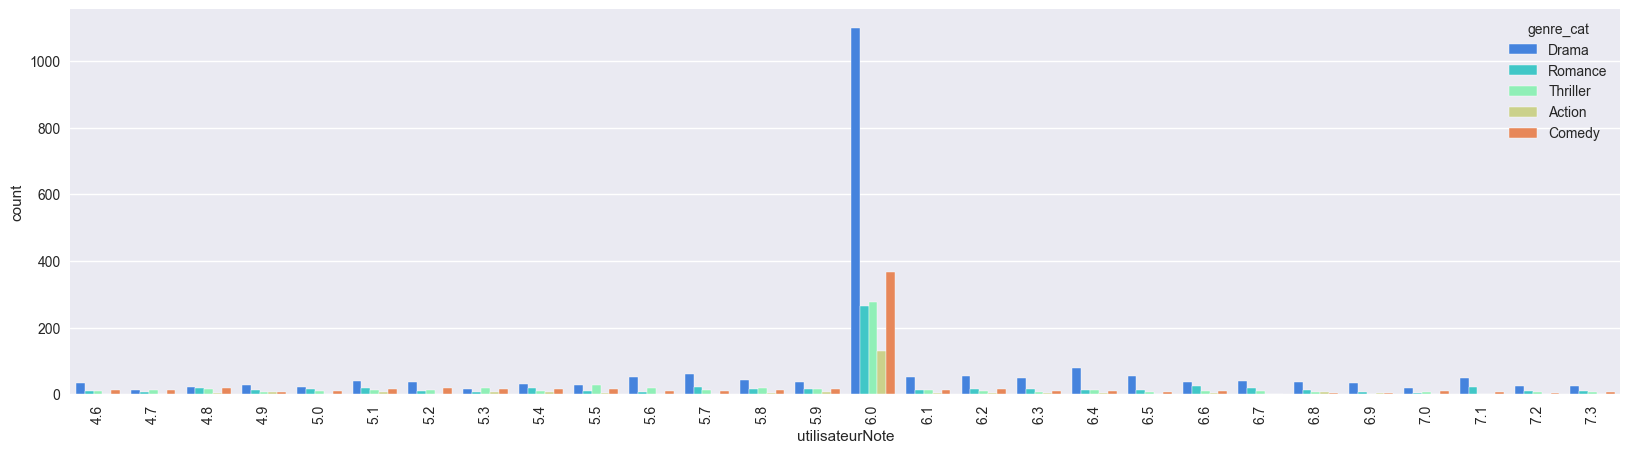

In [835]:
fig, ax1 = plt.subplots(figsize=(20,5))
graph = sns.countplot(ax=ax1,data=df_train,x = "utilisateurNote",hue="genre_cat",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    #graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

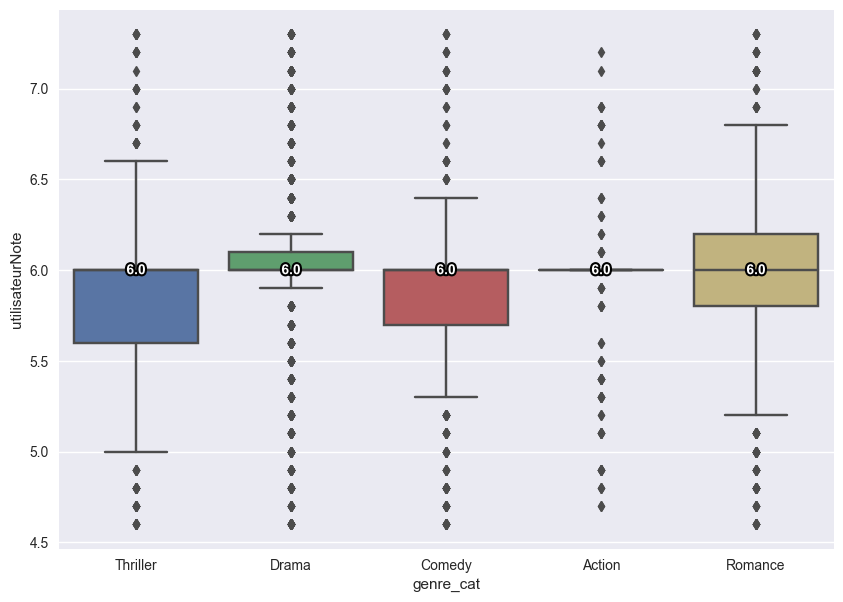

In [836]:
import matplotlib.patheffects as path_effects

fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='genre_cat', y='utilisateurNote', 
                           #hue='Sex', 
                           data=df,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

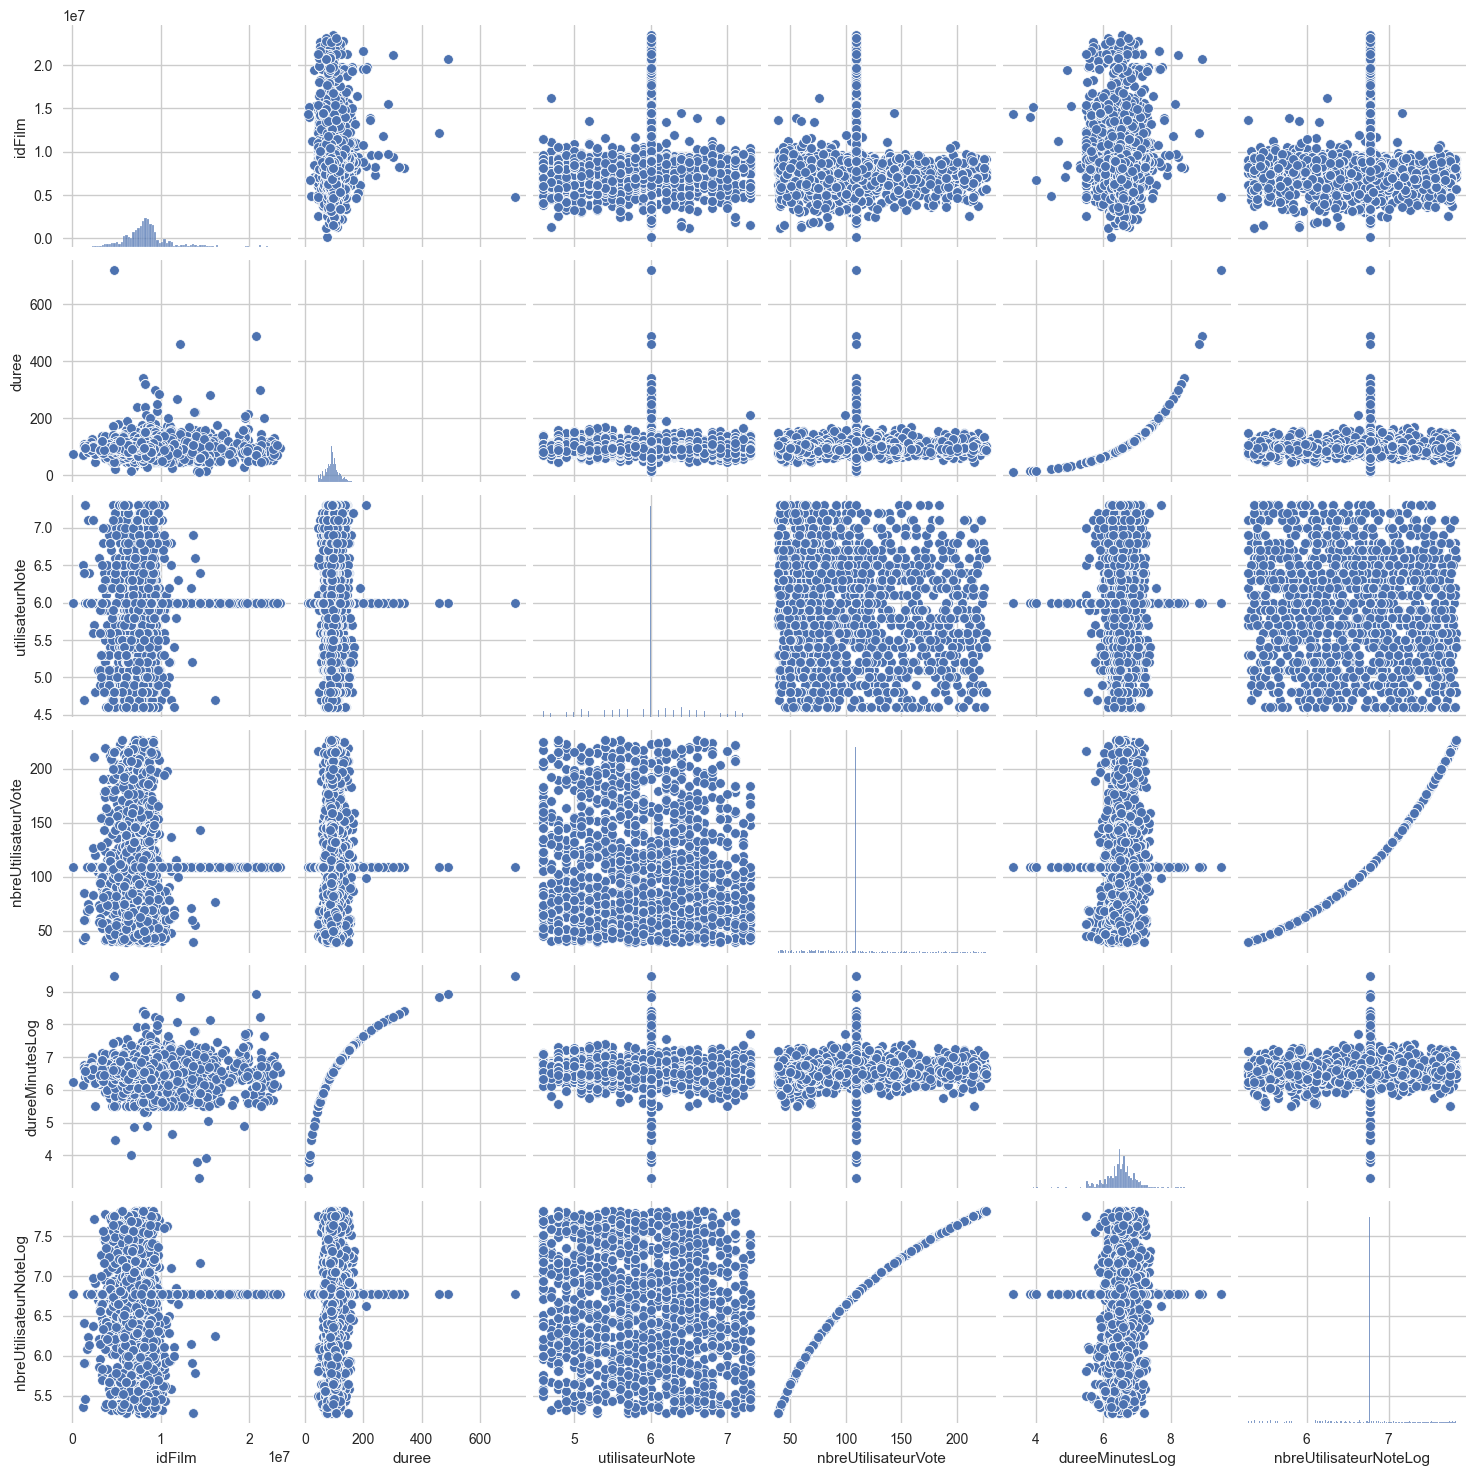

In [837]:
sns.pairplot(df)